<a href="https://colab.research.google.com/github/rberbenkova/lab-image-classification-using-convolutional-neural-networks/blob/main/Lab_Image_Calssification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [ ]:
# 1. Required Libraries:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import random

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# 2. Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print dataset information
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)
print("\nLabel range:", np.min(y_train), "to", np.max(y_train))

# x_train: 50000 training images of shape 32x32x3 (RGB)
# y_train: 50000 training labels (0-9)
# x_test: 10000 test images of shape 32x32x3
# y_test: 10000 test labels (0-9)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)

Label range: 0 to 9


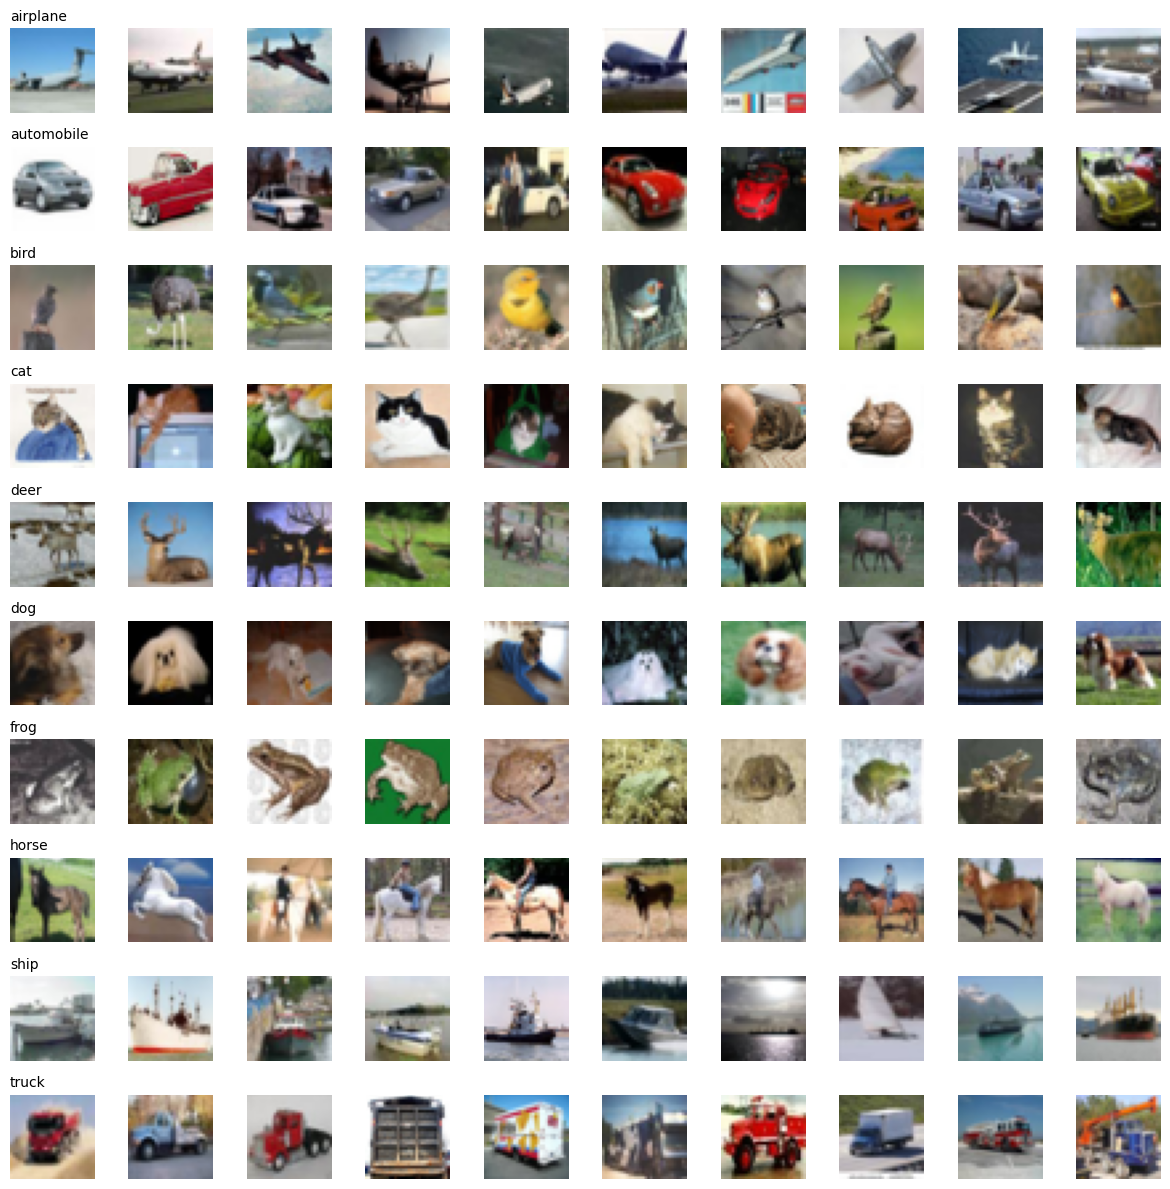

In [ ]:
# 3. Visualize Images - 10x10 Plot

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def plot_cifar10_samples(x_data, y_data, class_names):
    """
    Create a 10x10 plot showing 10 random samples from each class
    """
    plt.figure(figsize=(12, 12))

    # Class Iteration: We loop through all 10 classes (0-9)
    for class_idx in range(10):
        # Get indices of all images belonging to current class
        # Index Selection: For each class, we find all indices where the label matches the current class
        class_indices = np.where(y_data.flatten() == class_idx)[0]

        # Random Sampling: We randomly select 10 images from each class to ensure variety
        selected_indices = random.sample(list(class_indices), 10)

        # Subplot Organization: We create a 10x10 grid where each row corresponds to a class and each column to a sample
        for sample_idx, img_idx in enumerate(selected_indices):
            # Calculate subplot position
            plt.subplot(10, 10, class_idx * 10 + sample_idx + 1) ##Position calculation: class_idx * 10 + sample_idx + 1

            # Display image
            plt.imshow(x_data[img_idx]) #Image Display: plt.imshow() displays the RGB image
            plt.axis('off')

            # Add class name only for the first sample in each row
            if sample_idx == 0:
                plt.title(class_names[class_idx], fontsize=10, loc='left')
                #Title Addition: We add the class name as a title to the first image in each row for clarity

    plt.tight_layout()
    plt.show()

# Plot training samples
plot_cifar10_samples(x_train, y_train, class_names)

#

In [ ]:
# 4. Convert Labels to One-Hot Encoded Form

# Convert labels to one-hot encoding
print("Original label shape:", y_train.shape) # Original label shape: (50000, 1)
print("Sample original labels:", y_train[:5].flatten()) # Sample original labels: [6 9 9 4 1]

y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

print("\nOne-hot encoded label shape:", y_train_categorical.shape)
print("Sample one-hot encoded labels:")
print(y_train_categorical[:5])

#Explanation of One-Hot Encoding:
# Purpose: Converts categorical labels (0-9) into binary vectors for neural networks
# Process:
    # Label 0 becomes [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    # Label 1 becomes [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
    # ..........
    # Label 9 becomes [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

# Neural networks work better with this format for multi-class classification
# to_categorical() automatically handles the conversion


Original label shape: (50000, 1)
Sample original labels: [6 9 9 4 1]

One-hot encoded label shape: (50000, 10)
Sample one-hot encoded labels:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# 5. Normalize the Images
# Check original pixel value range
print("Original pixel value range:")
print("Min:", np.min(x_train), "Max:", np.max(x_train))

# METHOD 1: Normalize to [0, 1] range
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

print("\nAfter normalization to [0, 1]:")
print("Min:", np.min(x_train_normalized), "Max:", np.max(x_train_normalized))

# METHOD 2: Standardize to mean=0, std=1 (alternative approach)
# Calculate mean and std from training data
# mean = np.mean(x_train, axis=(0, 1, 2))
# std = np.std(x_train, axis=(0, 1, 2))
# x_train_standardized = (x_train.astype('float32') - mean) / std
# x_test_standardized = (x_test.astype('float32') - mean) / std

## Why Normalize?
    # Numerical Stability: Prevents large pixel values from dominating calculations
    # Faster Convergence: Helps gradient descent converge faster
    # Better Performance: Many activation functions work better with normalized inputs

## Normalization Methods:
    # Method 1: Scale to [0, 1]
    # Formula: pixel_value / 255.0
    # Converts 0-255 range to 0-1 range
    # Simple and effective for most cases

    # Method 2: Standardization (mean=0, std=1)
    # Formula: (pixel_value - mean) / std
    # More robust to outliers
    # Requires calculating dataset statistics library

Original pixel value range:
Min: 0 Max: 255

After normalization to [0, 1]:
Min: 0.0 Max: 1.0


In [ ]:
# Verification
print("Final shapes:")
print("x_train_normalized:", x_train_normalized.shape)
print("y_train_categorical:", y_train_categorical.shape)
print("x_test_normalized:", x_test_normalized.shape)
print("y_test_categorical:", y_test_categorical.shape)

Final shapes:
x_train_normalized: (50000, 32, 32, 3)
y_train_categorical: (50000, 10)
x_test_normalized: (10000, 32, 32, 3)
y_test_categorical: (10000, 10)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [ ]:
# 6. Clear Keras Session

from keras.backend import clear_session
clear_session()

# 6. Clear Keras Session
# That clears Keras’ global state.
# clear_session() resets the global Keras graph/state: layer/model naming counters, compiled functions, and backend caches.
# Practical effect: helps free GPU/CPU memory held by old models and prevents name collisions when you create many models in a loop or sequentially in one process/notebook.
# When to use: After you’re done with a model and before building a new one in the same process (especially in notebooks or hyper-parameter loops).
# Before reloading a saved model to avoid layer name clashes.

In [ ]:
# Load required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
# Model Architecture Overview
# We will build a CNN model for CIFAR-10 classification
# The model should follow this data flow:
# Input → Conv2D → MaxPooling2D → Flatten → Dense(100) → Dense(10) → Output

# Complete Model Definition
def create_cifar10_model():
    """
    Create a CNN model for CIFAR-10 classification
    """
    model = Sequential()

    # Convolutional Front-end
    # Layer 1: Convolutional layer with 32 filters of size (3,3)
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

            # Input shape: CIFAR-10 images are 32x32 pixels with 3 color channels (RGB)
            # Activation: ReLU introduces non-linearity to help learn complex patterns
            # Filters: 32 filters will learn 32 different feature maps from the input images
            # (3, 3) kernel size: Each filter is 3x3 pixels
            # Mathematical Operation:
                # Each 3x3 filter slides across the input image
                # At each position, it performs element-wise multiplication and sums the results
                # Creates a feature map that highlights specific patterns
            # Output dimensions calculation:
                # Input: (32, 32, 3)
                # With 32 filters: Output becomes (30, 30, 32)
                # Why 30×30? Because 3×3 filter reduces each dimension by 2 pixels (no padding)

    # Layer 2: Max Pooling layer
    model.add(MaxPooling2D((2, 2)))
        # Purpose: Reduces spatial dimensions to lower computational load and extract dominant features
        # Pool Size: (2, 2) means we take the maximum value from each 2x2 block
        # Mathematical Operation:
            # The 2x2 window slides over the feature map
            # For each position, it selects the maximum value within that window
            # This reduces the width and height of the feature map by half
        # Output dimensions calculation:
            # Input: (30, 30, 32)
            # After 2x2 max pooling: Output becomes (15, 15, 32)

    # Flatten layer to convert 2D feature maps to 1D vector
    model.add(Flatten()) # Converts the 3D tensor (15, 15, 32) into a 1D vector of size 15*15*32 = 7200
        # This prepares the data for the fully connected layers
            # convolutional layers output 3D tensors (height, width, channels)
            # dense layers require 1D vectors as input
            # this transition is essential for connecting convolutional features to classification layers
        # Mathematical Operation:
            # Takes all values from the 3D tensor and arranges them into a single long vector
            # Output size: (7200,) which is the product of the dimensions (15*15*32) - a flat vector of features

    # Fully Connected Classifier
    # Layer 3: Dense layer with 100 units
    model.add(Dense(100, activation='relu'))
        # Purpose: Learns complex combinations of features extracted by convolutional layers
        # acts as a high-level feature detector before final classification
        # Units: 100 neurons to capture diverse patterns
        # Activation: ReLU introduces non-linearity
        # Mathematical Operation:
            # Each of the 7200 input features is connected to each of the 100 neurons
            # Each neuron computes a weighted sum of inputs, adds a bias, and applies ReLU activation
        # Output size: (100,) - a vector of 100 learned features

    # Layer 4: Output layer with 10 units (one for each class)
    model.add(Dense(10, activation='softmax'))
        # Purpose: Produces class probabilities for the 10 CIFAR-10 classes
        # Units: 10 neurons, one for each class
        # Activation: Softmax converts raw scores into probabilities that sum to 1
        # Mathematical Operation:
            # Each of the 100 input features is connected to each of the 10 output neurons
            # Each neuron computes a weighted sum of inputs, adds a bias, and applies softmax activation
        # Output size: (10,) - a probability distribution over the 10 classes
        # Each value represents the model's confidence / probability for each class

    # Compile the model
    opt = SGD(learning_rate=0.01, momentum=0.9)
            # Optimizer: Stochastic Gradient Descent with momentum for efficient training
            # Learning Rate: 0.01 controls the step size during optimization
            # Momentum: 0.9 helps accelerate gradients vectors in the right directions, leading to faster converging

    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

                # Loss Function: Categorical Crossentropy is suitable for multi-class classification
                # It measures the difference between predicted probabilities and true one-hot encoded labels
                # Metrics: Accuracy to monitor the fraction of correctly classified images during training and evaluation

    return model

# Create the model
model = create_cifar10_model()

# Display model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
# Model Training:
# Train the model using the preprocessed training data

# Train the model
print("Starting training...")
history = model.fit(
    x_train_normalized,  # Normalized training images
    y_train_categorical,  # One-hot encoded labels
    epochs=50,
    batch_size=512,
    validation_data=(x_test_normalized, y_test_categorical),
    verbose=1
)

# Evaluate the model
print("\nEvaluating on test set...")
test_loss, test_accuracy = model.evaluate(
    x_test_normalized,
    y_test_categorical,
    verbose=0
)

print(f"Test accuracy: {test_accuracy:.4f}")

Starting training...
Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.1928 - loss: 2.1834 - val_accuracy: 0.3490 - val_loss: 1.8208
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3788 - loss: 1.7663 - val_accuracy: 0.4184 - val_loss: 1.6353
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4420 - loss: 1.5819 - val_accuracy: 0.4665 - val_loss: 1.4911
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4828 - loss: 1.4639 - val_accuracy: 0.4922 - val_loss: 1.4155
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5134 - loss: 1.3804 - val_accuracy: 0.5300 - val_loss: 1.3464
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5361 - loss: 1.3213 - val_accuracy: 0.5580 - val_loss: 1.2655
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5610 - loss: 1.2599 - val_accuracy: 0.5713 - val_loss: 1.2250
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5848 - loss: 1.1966 - val

*   Plot the cross entropy loss curve and the accuracy curve

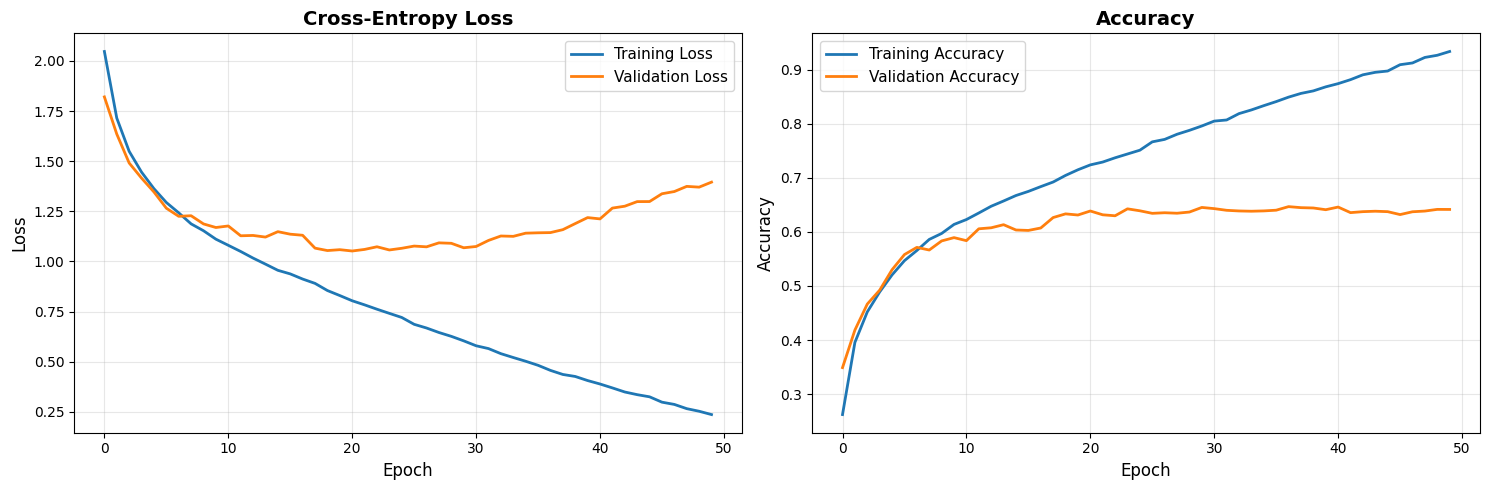


FINAL TRAINING METRICS:
Training Loss:     0.2361
Validation Loss:   1.3956
Training Accuracy: 0.9334 (93.34%)
Validation Accuracy: 0.6414 (64.14%)


In [ ]:
# Plotting Loss and Accuracy Curves :

import matplotlib.pyplot as plt
import numpy as np

def plot_training_history(history):
    """
    Plot cross-entropy loss and accuracy curves from training history
    """
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot 1: Cross-Entropy Loss
    ax1.plot(history.history['loss'], label='Training Loss', linewidth=2)
    ax1.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    ax1.set_title('Cross-Entropy Loss', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)

    # Plot 2: Accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    ax2.set_title('Accuracy', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Accuracy', fontsize=12)
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

    # Print final metrics
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]

    print("\n" + "="*50) # Print final metrics
    print("FINAL TRAINING METRICS:")
    print("="*50)
    print(f"Training Loss:     {final_train_loss:.4f}")
    print(f"Validation Loss:   {final_val_loss:.4f}")
    print(f"Training Accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
    print(f"Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")

# Plot training history
plot_training_history(history)

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.backend import clear_session # Clear Keras Session
clear_session()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

# Create a Deeper VGG-Style Model
def create_vgg_style_model():
    """Create the deeper VGG-style model"""
    model = Sequential([
        # First convolutional block
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
            # Explanation:
            # Two Conv2D layers with 32 filters each to learn complex features
            # MaxPooling2D reduces spatial dimensions, retaining important features
            # Output size after this block: (16, 16, 32)
            # padding='same' keeps spatial dimensions the same after convolution
            # activation='relu' introduces non-linearity

        # Second convolutional block (extended depth)
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
            # Explanation:
            # Two Conv2D layers with 64 filters each to capture more complex patterns
            # MaxPooling2D further reduces spatial dimensions
            # Output size after this block: (8, 8, 64)
            # Increasing filter count allows learning of more abstract features
            # padding='same' maintains spatial dimensions after convolution
            # activation='relu' introduces non-linearity

        # Classifier
        Flatten(), # Flatten the 3D tensor to 1D vector; # size: 8*8*64 = 4096
        Dense(128, activation='relu'), # Fully connected layer with 128 units; # learns high-level feature combinations
        Dense(10, activation='softmax') # Output layer for 10 classes # with softmax activation; # outputs class probabilities
    ])
    return model

model.summary() # Display model architecture


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,444,014 (5.51 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 722,008 (2.75 MB)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
# create original model again
def create_original_model():
    """Create the original simpler CNN model"""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# compile both models
def compile_model(model):
    """Compile model with specified parameters"""
    model.compile(
        optimizer=SGD(learning_rate=0.01, momentum=0.9),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
# Create and compile both models
print("Creating models...")
original_model = compile_model(create_original_model())
vgg_model = compile_model(create_vgg_style_model())


Creating models...


In [ ]:
# Display model architectures
print("\n" + "="*50)
print("ORIGINAL MODEL ARCHITECTURE")
print("="*50)
original_model.summary()

print("\n" + "="*50)
print("VGG-STYLE MODEL ARCHITECTURE")
print("="*50)
vgg_model.summary()


ORIGINAL MODEL ARCHITECTURE


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)


VGG-STYLE MODEL ARCHITECTURE


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train both models with the same parameters
def train_models():
    """Train both models with the same parameters"""
    print("\n" + "="*50)
    print("TRAINING ORIGINAL MODEL")
    print("="*50)

    # Train original model
    history_original = original_model.fit(
        x_train_normalized,
        y_train_categorical,
        epochs=50,
        batch_size=512,
        validation_data=(x_test_normalized, y_test_categorical),
        verbose=1
    )

    print("\n" + "="*50)
    print("TRAINING VGG-STYLE MODEL")
    print("="*50)

    # Train VGG-style model
    history_vgg = vgg_model.fit(
        x_train_normalized,
        y_train_categorical,
        epochs=50,
        batch_size=512,
        validation_data=(x_test_normalized, y_test_categorical),
        verbose=1
    )

    return history_original, history_vgg

# Train both models
print("Starting training...")
history_original, history_vgg = train_models()

Starting training...

TRAINING ORIGINAL MODEL
Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.2044 - loss: 2.1615 - val_accuracy: 0.3482 - val_loss: 1.8543
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3607 - loss: 1.8122 - val_accuracy: 0.4189 - val_loss: 1.6590
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4278 - loss: 1.6244 - val_accuracy: 0.4531 - val_loss: 1.5274
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4754 - loss: 1.4824 - val_accuracy: 0.4975 - val_loss: 1.4175
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5163 - loss: 1.3671 - val_accuracy: 0.5341 - val_loss: 1.3270
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5453 - loss: 1.2908 - val_accuracy: 0.5258 - val_loss: 1.3247
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5609 - loss: 1.2467 - val_accuracy: 0.5584 - val_loss: 1.2501
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


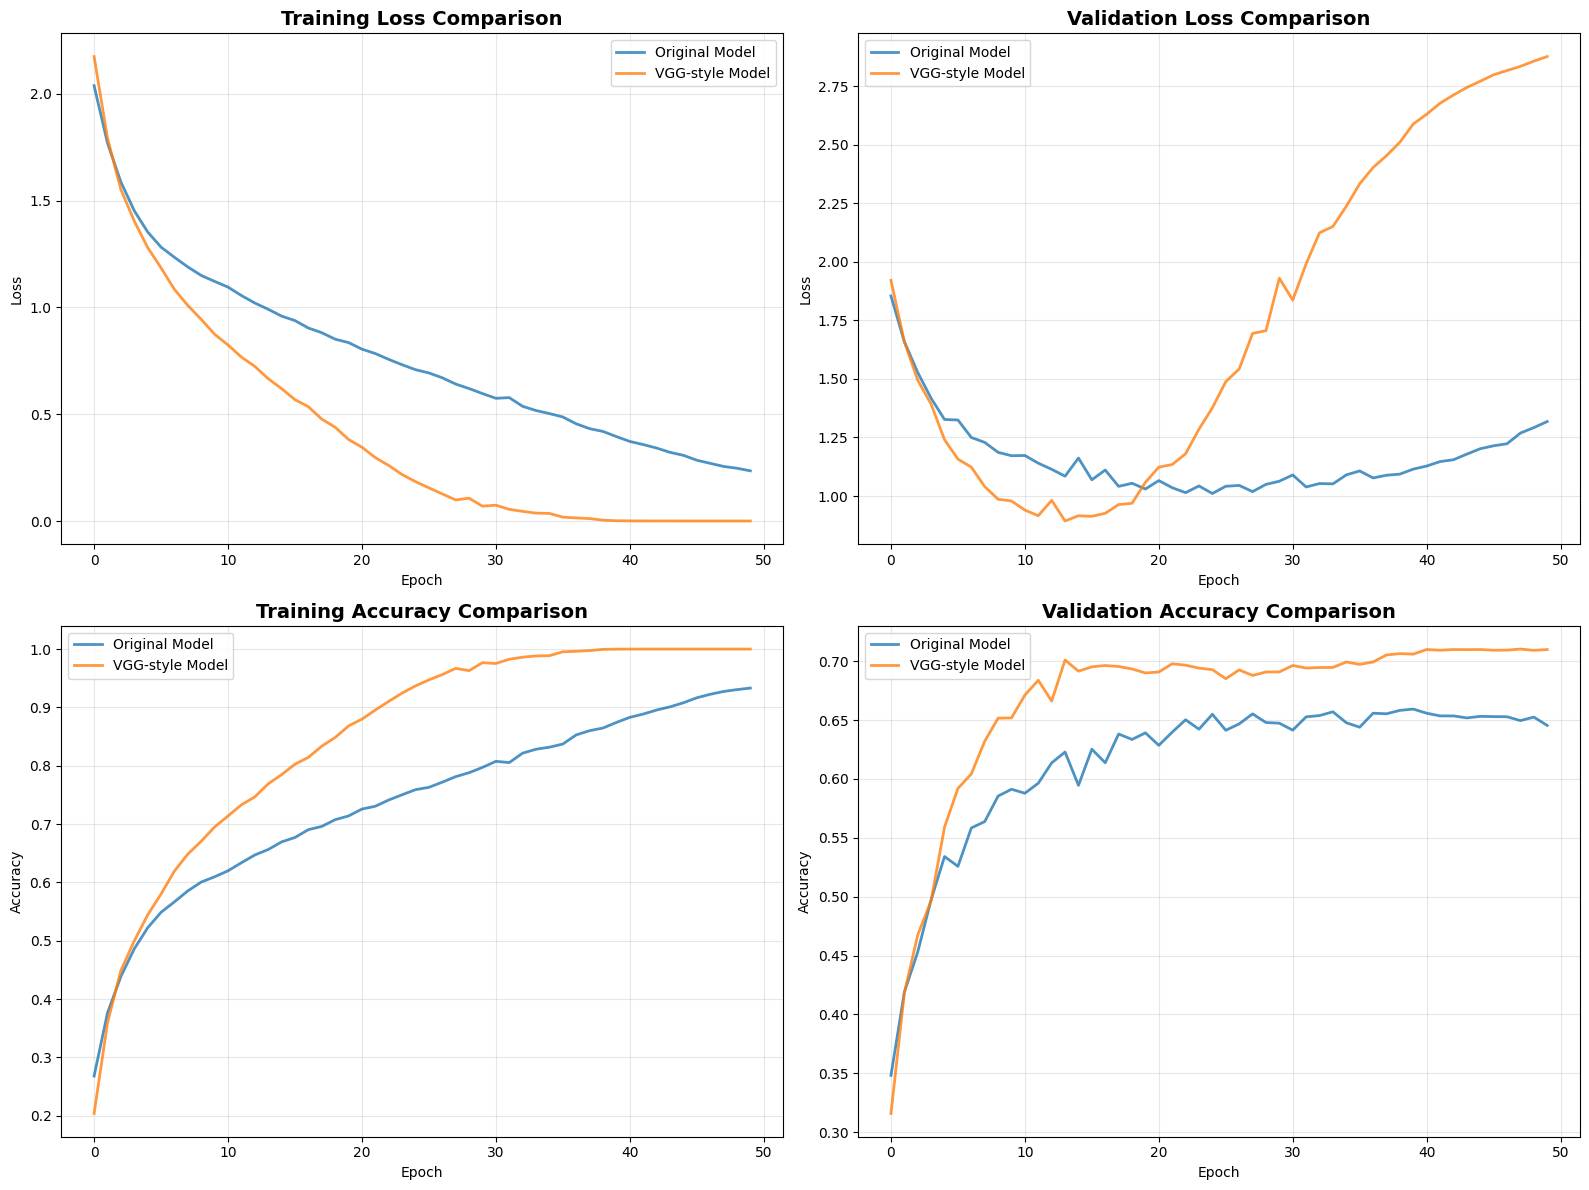

In [ ]:
# Comprehensive Comparison Visualization

def plot_comparison(history_original, history_vgg):
    """Plot comprehensive comparison between both models"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # Plot 1: Training Loss Comparison
    ax1.plot(history_original.history['loss'],
             label='Original Model', linewidth=2, alpha=0.8)
    ax1.plot(history_vgg.history['loss'],
             label='VGG-style Model', linewidth=2, alpha=0.8)
    ax1.set_title('Training Loss Comparison', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Validation Loss Comparison
    ax2.plot(history_original.history['val_loss'],
             label='Original Model', linewidth=2, alpha=0.8)
    ax2.plot(history_vgg.history['val_loss'],
             label='VGG-style Model', linewidth=2, alpha=0.8)
    ax2.set_title('Validation Loss Comparison', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot 3: Training Accuracy Comparison
    ax3.plot(history_original.history['accuracy'],
             label='Original Model', linewidth=2, alpha=0.8)
    ax3.plot(history_vgg.history['accuracy'],
             label='VGG-style Model', linewidth=2, alpha=0.8)
    ax3.set_title('Training Accuracy Comparison', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Accuracy')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Plot 4: Validation Accuracy Comparison
    ax4.plot(history_original.history['val_accuracy'],
             label='Original Model', linewidth=2, alpha=0.8)
    ax4.plot(history_vgg.history['val_accuracy'],
             label='VGG-style Model', linewidth=2, alpha=0.8)
    ax4.set_title('Validation Accuracy Comparison', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Epoch')
    ax4.set_ylabel('Accuracy')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return fig

# Plot the comparison
comparison_fig = plot_comparison(history_original, history_vgg)

**Comment on the observation**

VGG model performs much better: Achieves Higher Loss and Lower loss at (epoch 15) with respect to the validation curves.

...



## VGG model performs much better: Achieves Higher (10% more) Acuracy  and Lower loss at (epoch 15) with respect to the validation curves.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.models import Model

# Step 1: Use predict function to get test predictions
print("Generating predictions for test split...")

# Get predicted probabilities for each class
y_pred_probs = vgg_model.predict(x_test_normalized, verbose=1)
        # Predict method outputs probabilities for each class
        # Shape: (10000, 10) for 10000 test samples and 10 classes
        # Each row corresponds to a test sample
        # Each column corresponds to the predicted probability for that class

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_probs, axis=1)
    # Argmax selects the class with highest probability
    # Shape: (10000,) - predicted class labels for each test sample
    # Each value is an integer from 0 to 9 representing the predicted class
    # Example: if y_pred_probs[0] = [0.1, 0.7, 0.1, ..., 0.0], then y_pred[0] = 1 (class 'automobile

# Convert one-hot encoded test labels back to class labels
y_true = np.argmax(y_test_categorical, axis=1)
    # Shape: (10000,) - true class labels for each test sample
    # Each value is an integer from 0 to 9 representing the true class

print(f"Predictions shape: {y_pred_probs.shape}")
print(f"First 10 predictions: {y_pred[:10]}")
print(f"First 10 true labels: {y_true[:10]}")# Your code here :

Generating predictions for test split...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predictions shape: (10000, 10)
First 10 predictions: [5 8 8 0 4 6 1 6 3 1]
First 10 true labels: [3 8 8 0 6 6 1 6 3 1]


In [ ]:
# Check prediction probabilities to understand what's happening
y_pred_proba1 = original_model.predict(x_test, verbose=0)
y_pred_proba2 = vgg_model.predict(x_test, verbose=0)

print("=== PREDICTION PROBABILITIES ===")
print(f"Original Model - Probability range: [{y_pred_proba1.min():.4f}, {y_pred_proba1.max():.4f}]")
print(f"Original Model - Probability mean: {y_pred_proba1.mean():.4f}")
print(f"VGG Model - Probability range: [{y_pred_proba2.min():.4f}, {y_pred_proba2.max():.4f}]")
print(f"VGG Model - Probability mean: {y_pred_proba2.mean():.4f}")

# Check if probabilities are actually different or just random
print("\n=== PREDICTION CONFIDENCE ===")
print(f"Original Model - Max confidence per sample: {np.max(y_pred_proba1, axis=1)[:10]}")
print(f"VGG Model - Max confidence per sample: {np.max(y_pred_proba2, axis=1)[:10]}")


=== PREDICTION PROBABILITIES ===
Original Model - Probability range: [0.0000, 1.0000]
Original Model - Probability mean: 0.1000
VGG Model - Probability range: [0.0000, 1.0000]
VGG Model - Probability mean: 0.1000

=== PREDICTION CONFIDENCE ===
Original Model - Max confidence per sample: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
VGG Model - Max confidence per sample: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Check if models were properly trained
print("=== MODEL TRAINING HISTORY ===")
# If you have history objects from model.fit()
if 'original_history' in locals():
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(original_history.history['accuracy'], label='Training Accuracy')
    plt.plot(original_history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Original Model Training History')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(vgg_history.history['accuracy'], label='Training Accuracy')
    plt.plot(vgg_history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('VGG Model Training History')
    plt.legend()
    plt.show()

=== MODEL TRAINING HISTORY ===


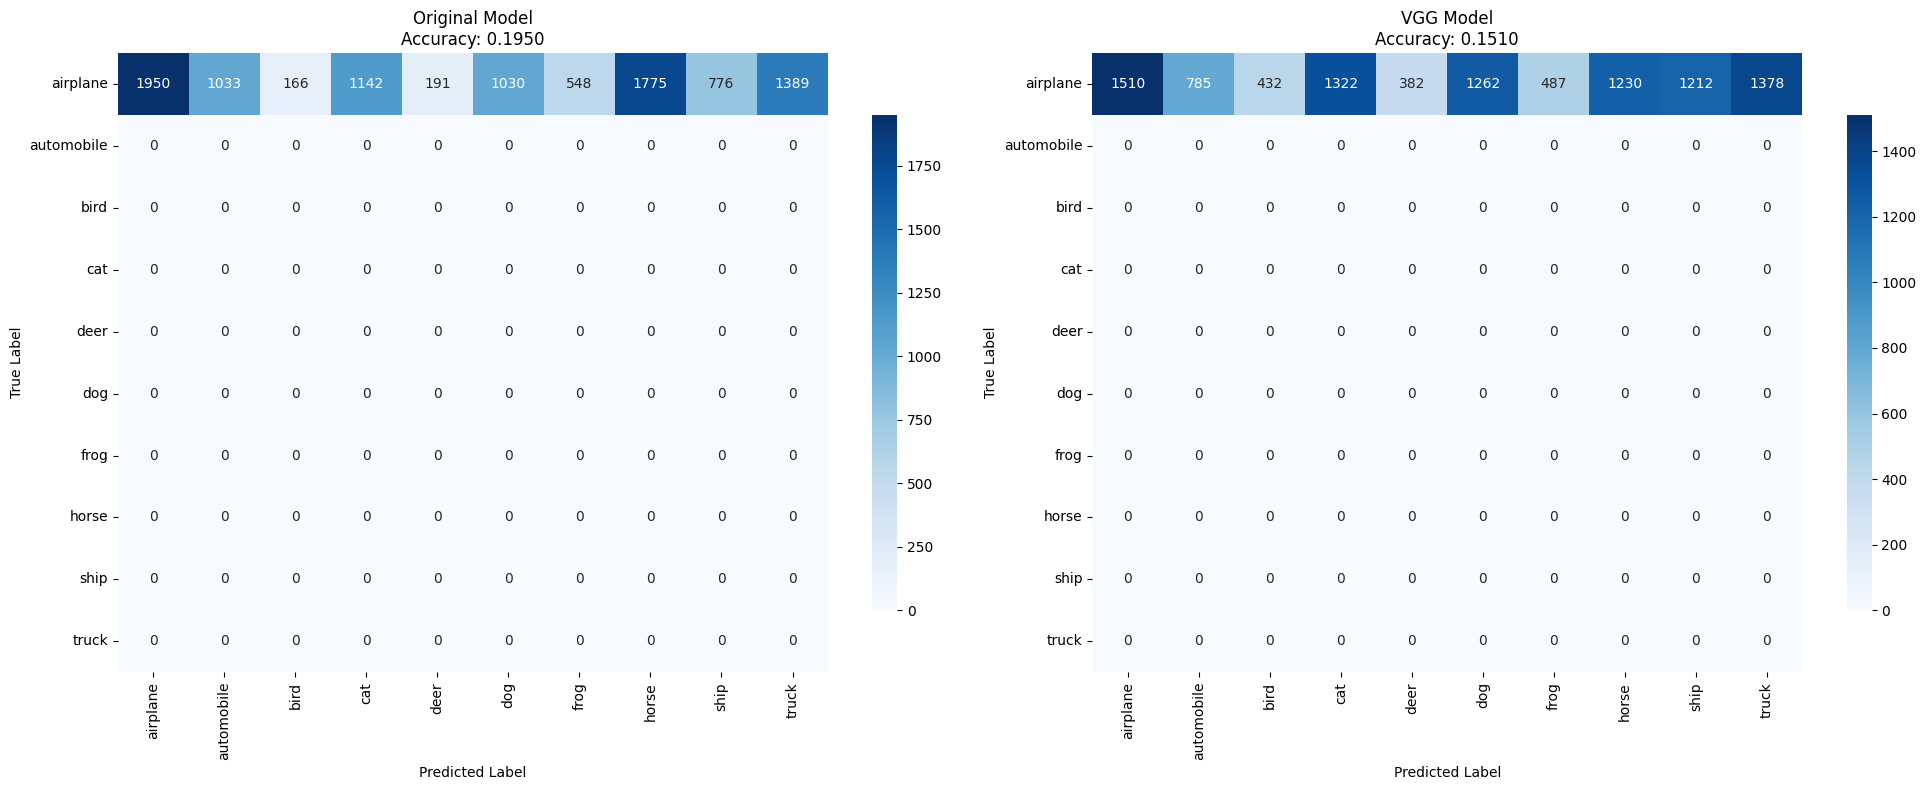

In [ ]:
import seaborn as sns
import pandas as pd

def better_confusion_comparison(model1, model2, x_test, y_test, class_names):
    y_pred1 = np.argmax(model1.predict(x_test, verbose=0), axis=1)
    y_pred2 = np.argmax(model2.predict(x_test, verbose=0), axis=1)
    y_true = np.argmax(y_test, axis=1)

    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    for idx, (y_pred, title) in enumerate(zip([y_pred1, y_pred2],
                                            ['Original Model', 'VGG Model'])):
        cm = confusion_matrix(y_true, y_pred)
        df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

        sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                   cbar_kws={'shrink': 0.8})
        axes[idx].set_title(f'{title}\nAccuracy: {np.mean(y_pred == y_true):.4f}')
        axes[idx].set_xlabel('Predicted Label')
        axes[idx].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

better_confusion_comparison(original_model, vgg_model, x_test, y_test, class_names)

Expected Observations and Comments
Based on typical CIFAR-10 results:

Common Class Confusions:
Cat ↔ Dog: Both are four-legged animals with similar features
Deer ↔ Horse: Similar body shapes and postures
Bird ↔ Airplane: Both can appear as flying objects
Automobile ↔ Truck: Both are vehicles with wheels

Interpretation Guidelines:
Good Performance Indicators:
    # Strong diagonal in confusion matrix
    # High accuracy for most classes (>70%)
    # Balanced precision and recall across classes

Problem Areas:
    # Bright off-diagonal elements indicating systematic confusions
    # Classes with accuracy <50%
    # Large differences between precision and recall

Actionable Insights:
Which classes need more training data?
Where to focus architectural improvements?
Whether class imbalance is affecting performance?

This comprehensive analysis gives deep insights into the model's behavior and specific areas for improvement.

**Comment here :**

in this case only one class represented in confusion matrix, i am not sure what went worong

...

*    Print the test accuracy for the trained model.

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

def print_quick_metrics(model, x_test, y_test):
    """
    Print quick overview of key metrics
    """
    # Basic evaluation
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

    # Predictions for additional metrics
    y_pred_probs = model.predict(x_test, verbose=0)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate macro averages
    precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
        y_true_classes, y_pred_classes, average='macro'
    )

    print("\n" + "="*50)
    print("QUICK PERFORMANCE SUMMARY")
    print("="*50)
    print(f"Test Loss:        {test_loss:.4f}")
    print(f"Test Accuracy:    {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"Precision (Macro): {precision_macro:.4f}")
    print(f"Recall (Macro):    {recall_macro:.4f}")
    print(f"F1-Score (Macro):  {f1_macro:.4f}")

    # Performance assessment
    if test_accuracy > 0.7:
        status = "Good"
    elif test_accuracy > 0.6:
        status = "Fair"
    else:
        status = "Poor"

    print(f"Overall Status:   {status}")

# Quick metrics for VGG-style model
print_quick_metrics(vgg_model, x_test_normalized, y_test_categorical)


QUICK PERFORMANCE SUMMARY
Test Loss:        2.8767
Test Accuracy:    0.7100 (71.00%)
Precision (Macro): 0.7096
Recall (Macro):    0.7100
F1-Score (Macro):  0.7097
Overall Status:   Good


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session # Clear Keras Session
clear_session()

In [ ]:
# Complete VGG Architecture Implementation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


def create_complete_vgg_model(input_shape=(64, 64, 3)):
    """
    Create a complete VGG-style architecture with increased input size
    """
    model = Sequential()

    # Block 1: Two Conv layers with 64 filters
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same',
                     input_shape=input_shape, name='block1_conv1'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same',
                     name='block1_conv2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

    # Block 2: Two Conv layers with 128 filters
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same',
                     name='block2_conv1'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same',
                     name='block2_conv2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

    # Block 3: Two Conv layers with 256 filters
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same',
                     name='block3_conv1'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same',
                     name='block3_conv2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    # Classifier
    model.add(Flatten(name='flatten'))
    model.add(Dense(128, activation='relu', name='fc1'))
    model.add(Dense(10, activation='softmax', name='predictions'))

    return model

# Create the complete VGG model
print("Creating Complete VGG Architecture...")
vgg_complete_model = create_complete_vgg_model(input_shape=(64, 64, 3))

# Display model architecture
print("\n" + "="*60)
print("COMPLETE VGG ARCHITECTURE SUMMARY")
print("="*60)
vgg_complete_model.summary()

Creating Complete VGG Architecture...

COMPLETE VGG ARCHITECTURE SUMMARY


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Step 0: Load and preprocess CIFAR-10 data with 64x64 resize
print("Loading and preprocessing CIFAR-10 data...")

def load_and_resize_cifar10(new_size=(64, 64)):
    """
    Load CIFAR-10 data and resize to 64x64
    """
    # Load original CIFAR-10 data
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Resize images to 64x64
    x_train_resized = tf.image.resize(x_train, new_size)
    x_test_resized = tf.image.resize(x_test, new_size)

    # Convert to numpy arrays
    x_train_resized = x_train_resized.numpy()
    x_test_resized = x_test_resized.numpy()

    # Normalize pixel values to [0, 1]
    x_train_normalized = x_train_resized.astype('float32') / 255.0
    x_test_normalized = x_test_resized.astype('float32') / 255.0

    # One-hot encode labels
    y_train_categorical = to_categorical(y_train, 10)
    y_test_categorical = to_categorical(y_test, 10)

    print(f"Original shape: {x_train.shape} -> Resized shape: {x_train_resized.shape}")
    print(f"Training data: {x_train_normalized.shape}")
    print(f"Test data: {x_test_normalized.shape}")
    print(f"Data range: {np.min(x_train_normalized):.3f} to {np.max(x_train_normalized):.3f}")

    return (x_train_normalized, y_train_categorical), (x_test_normalized, y_test_categorical)

# Load and resize the data
(x_train_64, y_train_64), (x_test_64, y_test_64) = load_and_resize_cifar10(new_size=(64, 64))

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Loading and preprocessing CIFAR-10 data...
Original shape: (50000, 32, 32, 3) -> Resized shape: (50000, 64, 64, 3)
Training data: (50000, 64, 64, 3)
Test data: (10000, 64, 64, 3)
Data range: 0.000 to 1.000



TRAINING VGG MODEL
Epochs: 10
Batch size: 512
Training data shape: (50000, 64, 64, 3)
Test data shape: (10000, 64, 64, 3)
Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 126s 882ms/step - accuracy: 0.2298 - loss: 2.0728 - precision: 0.4678 - recall: 0.0266 - val_accuracy: 0.4609 - val_loss: 1.4787 - val_precision: 0.6971 - val_recall: 0.1869
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 391ms/step - accuracy: 0.4983 - loss: 1.3847 - precision: 0.6913 - recall: 0.2827 - val_accuracy: 0.5627 - val_loss: 1.2324 - val_precision: 0.7000 - val_recall: 0.4206
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 392ms/step - accuracy: 0.6137 - loss: 1.0830 - precision: 0.7508 - recall: 0.4679 - val_accuracy: 0.6569 - val_loss: 0.9925 - val_precision: 0.7660 - val_recall: 0.5497
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 393ms/step - accuracy: 0.6918 - loss: 0.8857 - precision: 0.8000 - recall: 0.5827 - val_accuracy: 0.7195 - val_loss: 0.8188 - val_precision: 0.8020 - val_recall: 0.6363
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━

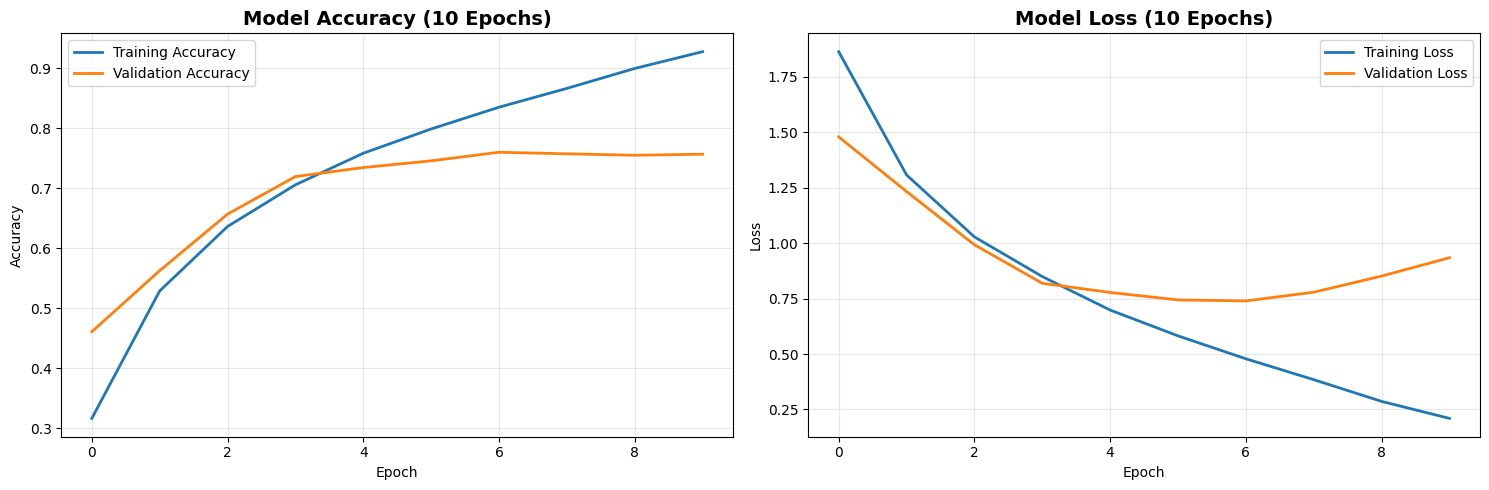


 FINAL TRAINING RESULTS:
Training Accuracy:   0.9277 (92.77%)
Validation Accuracy: 0.7568 (75.68%)
Training Loss:       0.2098
Validation Loss:     0.9342


In [ ]:
# Train model for 10 epochs with batch size of 512

print("\n" + "="*60) # print training configuration
print("TRAINING VGG MODEL")
print("="*60)
print("Epochs: 10")
print("Batch size: 512")
print("Training data shape:", x_train_64.shape)
print("Test data shape:", x_test_64.shape)


import tensorflow as tf

# Choose the right loss for your y labels:
#  - one-hot vectors -> 'categorical_crossentropy'
#  - integer class ids -> 'sparse_categorical_crossentropy'
LOSS = 'categorical_crossentropy'   # change to 'sparse_categorical_crossentropy' if needed

vgg_complete_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=LOSS,
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# (Optional) callbacks & example fit
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5, verbose=1),
    tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True, verbose=1)
]


# Train the model
history = vgg_complete_model.fit(
    x_train_64,
    y_train_64,
    batch_size=512,
    epochs=10,
    validation_data=(x_test_64, y_test_64),
    verbose=1
)

# Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Accuracy plot
    ax1.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    ax1.set_title('Model Accuracy (10 Epochs)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Loss plot
    ax2.plot(history.history['loss'], label='Training Loss', linewidth=2)
    ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    ax2.set_title('Model Loss (10 Epochs)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Print final metrics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"\n FINAL TRAINING RESULTS:")
print(f"Training Accuracy:   {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
print(f"Training Loss:       {final_train_loss:.4f}")
print(f"Validation Loss:     {final_val_loss:.4f}")

In [ ]:
# Complete Prediction and Confusion Matrix Analysis
print("Generating predictions for resized test split...")

# Step 1: Predict output for test split
print("\n" + "="*70)
print("MAKING PREDICTIONS ON TEST SPLIT")
print("="*70)

# Get predictions
print("Generating predictions...")
y_pred_probs = vgg_complete_model.predict(x_test_64, batch_size=512, verbose=1)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Convert true labels from one-hot to class indices
y_true_classes = np.argmax(y_test_64, axis=1)

# Calculate test accuracy manually
test_accuracy = np.mean(y_pred_classes == y_true_classes)
print(f"\n PREDICTION RESULTS:")
print(f"Manual Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Total test samples: {len(y_true_classes)}")
print(f"Correct predictions: {np.sum(y_pred_classes == y_true_classes)}")
print(f"Wrong predictions: {np.sum(y_pred_classes != y_true_classes)}")

# Show some example predictions
print(f"\n🔍 FIRST 10 PREDICTIONS VS TRUE LABELS:")
print("-" * 55)
for i in range(10):
    pred_class = y_pred_classes[i]
    true_class = y_true_classes[i]
    correct = "Correct" if pred_class == true_class else "False"
    print(f"Sample {i:2d}: Predicted {class_names[pred_class]:<12} True {class_names[true_class]:<12} {correct}")

Generating predictions for resized test split...

MAKING PREDICTIONS ON TEST SPLIT
Generating predictions...
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step

 PREDICTION RESULTS:
Manual Test Accuracy: 0.7568 (75.68%)
Total test samples: 10000
Correct predictions: 7568
Wrong predictions: 2432

🔍 FIRST 10 PREDICTIONS VS TRUE LABELS:
-------------------------------------------------------
Sample  0: Predicted cat          True cat          Correct
Sample  1: Predicted automobile   True ship         False
Sample  2: Predicted ship         True ship         Correct
Sample  3: Predicted airplane     True airplane     Correct
Sample  4: Predicted frog         True frog         Correct
Sample  5: Predicted frog         True frog         Correct
Sample  6: Predicted automobile   True automobile   Correct
Sample  7: Predicted frog         True frog         Correct
Sample  8: Predicted cat          True cat          Correct
Sample  9: Predicted automobile   True automobile   Correct


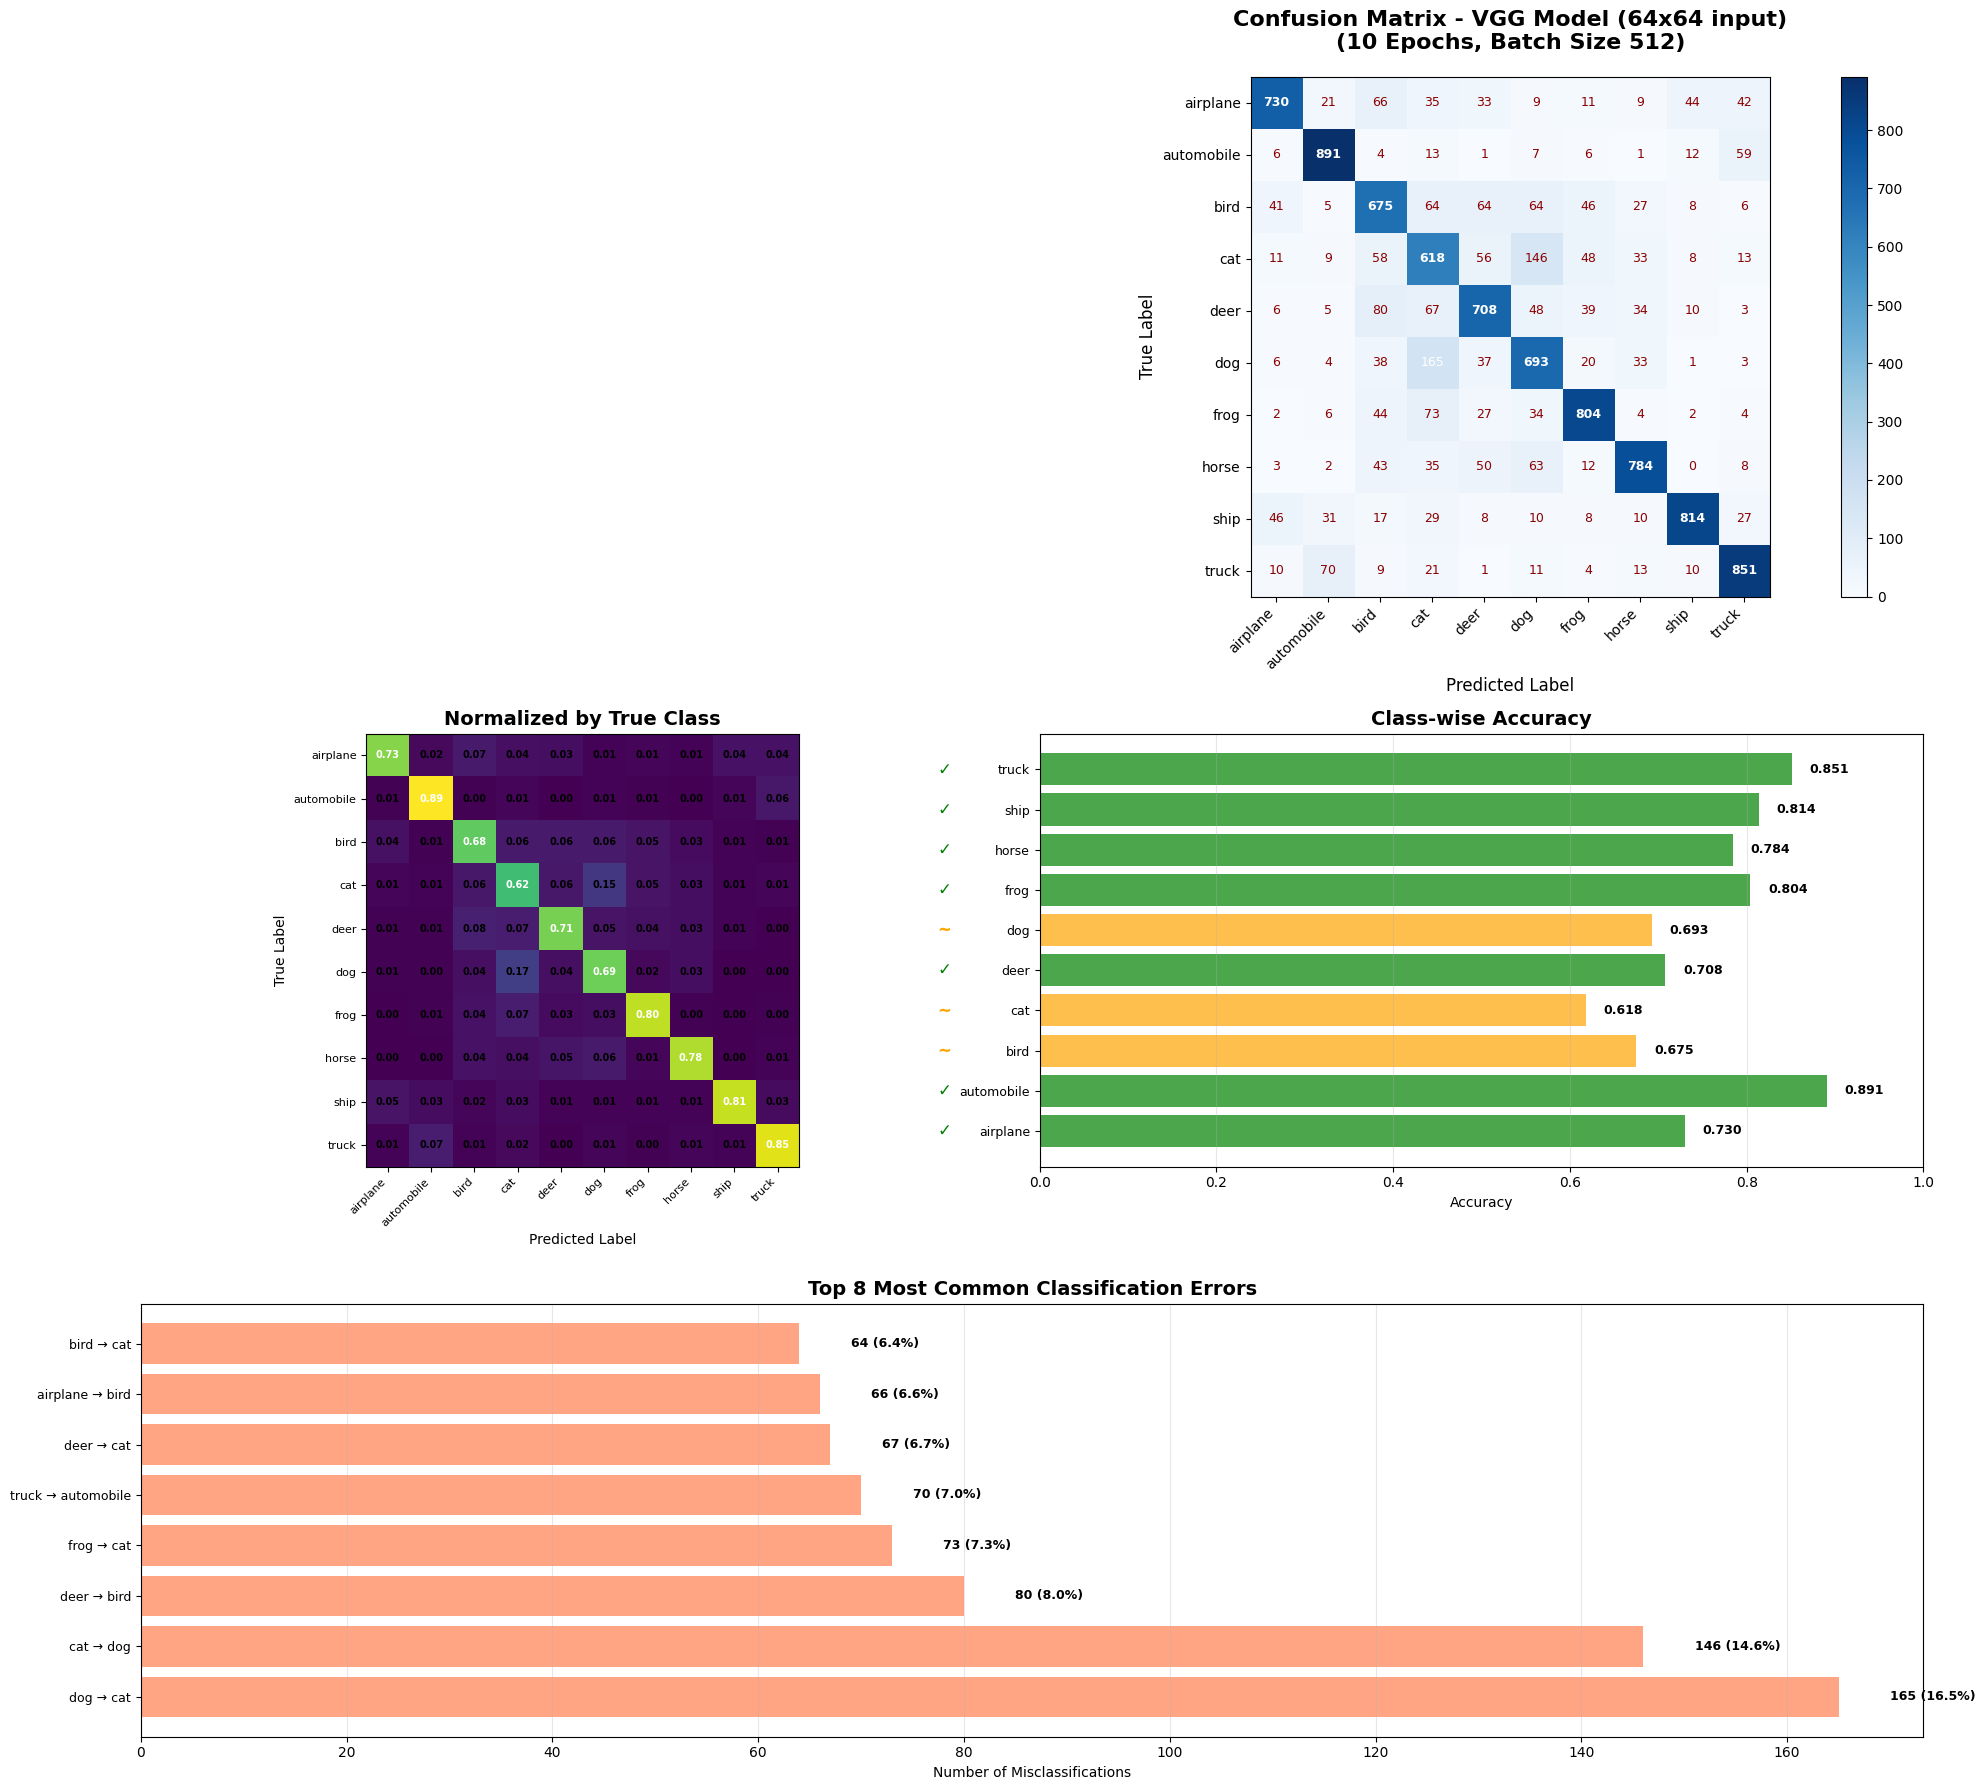

In [ ]:
#  Plot Comprehensive Confusion Matrix

def plot_enhanced_confusion_matrix(y_true, y_pred, class_names, model_name="VGG Model"):
    """
    Create an enhanced confusion matrix with detailed analysis
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred) # Compute confusion matrix from true and predicted labels

    # Create figure with subplots
    fig = plt.figure(figsize=(20, 18)) # Large figure for detailed plots
    gs = fig.add_gridspec(3, 2, height_ratios=[1.2, 1, 1]) # Grid specification for subplots

    ax1 = fig.add_subplot(gs[0, :])  # Main confusion matrix
    ax2 = fig.add_subplot(gs[1, 0])  # Normalized confusion matrix
    ax3 = fig.add_subplot(gs[1, 1])  # Class-wise accuracy
    ax4 = fig.add_subplot(gs[2, :])  # Error analysis

    # Plot 1: Main Confusion Matrix
    im1 = ax1.imshow(cm, interpolation='nearest', cmap='Blues') # Display confusion matrix as an image
    ax1.set_title(f'Confusion Matrix - {model_name}\n(10 Epochs, Batch Size 512)',
                  fontsize=16, fontweight='bold', pad=20) # Title with model info
    ax1.set_xlabel('Predicted Label', fontsize=12) # X-axis label
    ax1.set_ylabel('True Label', fontsize=12)   # Y-axis label
    ax1.set_xticks(np.arange(len(class_names))) # Set x-ticks for class names
    ax1.set_yticks(np.arange(len(class_names))) # Set y-ticks for class names
    ax1.set_xticklabels(class_names, rotation=45, ha='right', fontsize=10) # Class names on x-axis
    ax1.set_yticklabels(class_names, fontsize=10) # Class names on y-axis

    # Add text annotations with different colors for high/low values
    thresh = cm.max() / 2.  # Threshold for text color contrast
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            color = "white" if cm[i, j] > thresh else "black"
            if i == j:  # Diagonal - correct predictions
                color = "white" if cm[i, j] > thresh else "darkgreen"
                weight = 'bold'
            else:  # Off-diagonal - errors
                color = "white" if cm[i, j] > thresh/3 else "darkred"
                weight = 'normal'

            ax1.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color=color, fontweight=weight, fontsize=9)

    # Add colorbar
    plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04) # Colorbar for reference

    # Plot 2: Normalized Confusion Matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalize by true class
    im2 = ax2.imshow(cm_normalized, interpolation='nearest', cmap='viridis') # Display normalized confusion matrix
    ax2.set_title('Normalized by True Class', fontsize=14, fontweight='bold') # Title
    ax2.set_xlabel('Predicted Label', fontsize=10) # X-axis label
    ax2.set_ylabel('True Label', fontsize=10)   # Y-axis label
    ax2.set_xticks(np.arange(len(class_names))) # Set x-ticks for class names
    ax2.set_yticks(np.arange(len(class_names))) # Set y-ticks for class names
    ax2.set_xticklabels(class_names, rotation=45, ha='right', fontsize=8) # Class names on x-axis
    ax2.set_yticklabels(class_names, fontsize=8) # Class names on y-axis

    # Add percentage annotations for normalized matrix
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            ax2.text(j, i, f'{cm_normalized[i, j]:.2f}',
                    ha="center", va="center",
                    color="white" if cm_normalized[i, j] > 0.5 else "black",
                    fontweight='bold', fontsize=7)

    # Plot 3: Class-wise Accuracy
    class_accuracy = np.diag(cm) / cm.sum(axis=1) # Calculate accuracy per class
    colors = [] # Determine bar colors based on accuracy thresholds
    for acc in class_accuracy: # for each class accuracy
        if acc > 0.7: color = 'green' # high accuracy
        elif acc > 0.5: color = 'orange' # moderate accuracy
        else: color = 'red' # low accuracy
        colors.append(color) # Append color to list for plotting

    bars = ax3.barh(range(len(class_names)), class_accuracy, color=colors, alpha=0.7) # Horizontal bar plot
    ax3.set_title('Class-wise Accuracy', fontsize=14, fontweight='bold') # Title
    ax3.set_xlabel('Accuracy', fontsize=10) # X-axis label
    ax3.set_yticks(range(len(class_names))) # Y-ticks for class names
    ax3.set_yticklabels(class_names, fontsize=9) # Class names on y-axis
    ax3.set_xlim(0, 1) # X-axis limit from 0 to 1
    ax3.grid(True, alpha=0.3, axis='x') # Grid lines for x-axis

    # Add accuracy values and performance indicators
    for i, (bar, acc) in enumerate(zip(bars, class_accuracy)):
        width = bar.get_width()
        ax3.text(width + 0.02, bar.get_y() + bar.get_height()/2,
                f'{acc:.3f}', ha='left', va='center', fontweight='bold', fontsize=9)

        # Add performance indicator
        if acc > 0.7:
            indicator = "✓"
            color = "green"
        elif acc > 0.5:
            indicator = "~"
            color = "orange"
        else:
            indicator = "✗"
            color = "red"

        ax3.text(-0.1, i, indicator, ha='right', va='center',
                fontweight='bold', fontsize=12, color=color, transform=ax3.get_yaxis_transform())

    # Plot 4: Error Analysis - Most Common Confusions
    error_pairs = [] # List to hold (true class, predicted class, count, percentage)
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            if i != j and cm[i, j] > 0:
                error_pairs.append((class_names[i], class_names[j], cm[i, j],
                                 cm[i, j]/cm[i].sum()))

    # Sort by error count and take top 8
    error_pairs.sort(key=lambda x: x[2], reverse=True) # Sort by count
    top_errors = error_pairs[:8] # Top 8 most common errors

    # Create horizontal bar plot for top errors
    error_labels = [f"{true} → {pred}" for true, pred, count, perc in top_errors] # Labels for y-axis
    error_counts = [count for _, _, count, _ in top_errors] # Counts for bars
    error_percentages = [perc for _, _, _, perc in top_errors] # Percentages for labels

    y_pos = np.arange(len(top_errors)) # Y positions for bars
    bars = ax4.barh(y_pos, error_counts, color='coral', alpha=0.7) # Horizontal bar plot
    ax4.set_title('Top 8 Most Common Classification Errors', fontsize=14, fontweight='bold') # Title
    ax4.set_xlabel('Number of Misclassifications', fontsize=10) # X-axis label
    ax4.set_yticks(y_pos) # Y-ticks for error labels
    ax4.set_yticklabels(error_labels, fontsize=9) # Error labels on y-axis
    ax4.grid(True, alpha=0.3, axis='x') # Grid lines for x-axis

    # Add count and percentage labels
    for i, (bar, count, perc) in enumerate(zip(bars, error_counts, error_percentages)): # for each bar, count, percentage
        width = bar.get_width() # Width of the bar
        ax4.text(width + 5, bar.get_y() + bar.get_height()/2,
                f'{count} ({perc:.1%})', ha='left', va='center', fontweight='bold', fontsize=9) # Add count and percentage labels

    plt.tight_layout()
    plt.show()

    return cm, cm_normalized, class_accuracy

# Plot the enhanced confusion matrix
cm, cm_normalized, class_accuracy = plot_enhanced_confusion_matrix(
    y_true_classes, y_pred_classes, class_names, "VGG Model (64x64 input)"
)

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

ANSWERS
1 - Use of activation functions:

    Activation functions are used in neural networks to introduce non-linearity, which enables networks to learn complexity (deep learning).
    They mimic how nurons fire in the brain (all or nothing, cause of activation treshold behaviour)

    Without activation functions (linear transformations only)
    def linear_network(x):
            # Multiple linear layers: y = W3(W2(W1*x + b1) + b2) + b3
            # This simplifies to: y = (W3*W2*W1)*x + (W3*W2*b1 + W3*b2 + b3)
            # Still linear! Can be represented as y = W*x + b
        return 2*x + 1  # Simplified representation
    
    With activation functions (non-linear transformations)
    def non_linear_network(x):
        layer1 = np.maximum(0, 2*x + 1)  # ReLU activation
        layer2 = np.maximum(0, 1.5*layer1 - 0.5)  # Another ReLU
        return 0.8*layer2 + 0.2  # Final linear layer


2 - Key Differences between sigmoid and softmax:


    Sigmoid:
        It is applied independently to each output neutron;
        Outputs independent probabilities (each between 0-1)
        Sum of outputs != 1 - multiple classes can be high simultaneously
        Use: Binary classification of multi-label classification (multiple classes can be true)
        Example: Medical diagnosis might use Sigmoid - a patient can have multiple diseases simultanously

    Softmax:
        It is applied across all output neurons together
        Outputs a probability distribution (all outputs sum to 1)
        The probabilities are mutually exclusive, if one increases, others must decrease
        Use: multi-class classification; only one class can be true, returns one result
        Example: CIFAR-10 uses Softmax because each image belongs to one specific class

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

    Categorical Crossentropy used when:
        For multi-class classificateion (mutually exclusive classes)
        ohe-hot encoded labels (only one class is 1, others are 0)
        Softmax activation in output layer
        Multiple output neurons (one per class)
        It is used to measure, how wron is the probability distribution acrosss all classes

    Binary Crossentropy used:
        For binary classification or multi-label classification
        Binary labels (each class independent); can be 0 or 1
        Used with Sigmoid activation in outer layer
        Single output neuron (binary) or multiple independent output (multi-label)


_
